In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import os
import numpy as np
import requests

current_sim = '' # Simulation folder

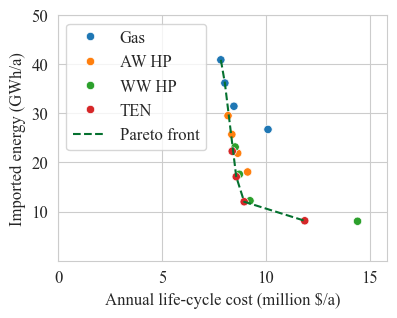

In [ ]:
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

folder_ini = rf'...\{current_sim}' # Hard link to the simulation folder

folders_temp = [name for name in os.listdir(folder_ini) if os.path.isdir(os.path.join(folder_ini, name))]
variantes = ['gas', 'a2w', 'w2w', 'ets']
folders = []
for k in variantes:
    for j in folders_temp:
        if k in j:
            folders.append(j)

names = {'gas': 'Gas', 'a2w': 'AW HP', 'w2w': 'WW HP', 'ets':'TEN'}

tot = pd.DataFrame()
for f in folders:
    files = os.listdir(os.path.join(folder_ini, f))
    file = [j for j in files if 'Summary' in j][0]
    eimp = pd.read_excel(os.path.join(folder_ini, f, file), sheet_name='Imports').groupby('Solution').sum(numeric_only=True)[['Imported energy (kWh/year)']]
    eimp = pd.read_excel(os.path.join(folder_ini, f, file), sheet_name='Imports')
    eimp = eimp[eimp['Name'].isin(['Gas', 'Electricity'])]
    eimp = eimp.groupby('Solution').sum(numeric_only=True)[['Imported energy (kWh/year)']]
    summ = pd.read_excel(os.path.join(folder_ini, f, file), sheet_name='Key Results').groupby('Solution').sum(numeric_only=True)[['Annualized life-cycle cost (USD/year)']]
    res = pd.concat([eimp, summ], axis=1)
    res['scenario'] = names[f.split('-')[1].split('_')[0]]
    tot = pd.concat([tot, res])


tot = tot.reset_index()
tot.index = tot['scenario'] + ' - ' + tot['Solution']
tot['Imported energy (kWh/year)'] = tot['Imported energy (kWh/year)'] / 1000000
tot['Annualized life-cycle cost (USD/year)'] = tot['Annualized life-cycle cost (USD/year)'] / 1000000

pareto_front = tot[tot.index.isin(['Gas - Solution 1',
                                   'Gas - Solution 2',
                                   'TEN - Solution 2',
                                   'TEN - Solution 3',
                                   'TEN - Solution 4'])]

plt.figure(figsize=((8.5)/ 2 , (8.5)/ 2 * 3 / 4))
sns.scatterplot(data = tot, x = 'Annualized life-cycle cost (USD/year)', y = 'Imported energy (kWh/year)', hue = 'scenario')
plt.plot(pareto_front['Annualized life-cycle cost (USD/year)'], pareto_front['Imported energy (kWh/year)'], linestyle='dashed', color = sns.color_palette("Greens")[5], label = 'Pareto front')
plt.xlim(0, max(tot['Annualized life-cycle cost (USD/year)'] * 1.1))  # Adding some padding for better visualization
plt.ylim(0, max(tot['Imported energy (kWh/year)'] * 1.1))
plt.xlabel('Annual life-cycle cost (million $/a)')
plt.ylabel('Imported energy (GWh/a)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().set_yticks(plt.gca().get_yticks()[1:])
plt.legend(loc='upper left')
plt.savefig(r'img/pareto_import.pdf', bbox_inches='tight')
plt.show()


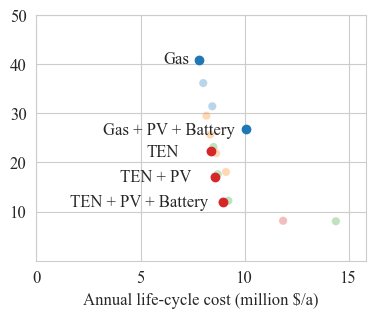

In [ ]:
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

selection = {'Gas - Solution 1':'Gas',
             'Gas - Solution 4':'Gas + PV + Battery',
             'TEN - Solution 1':'TEN',
             'TEN - Solution 2':'TEN + PV',
             'TEN - Solution 3':'TEN + PV + Battery'}
colors_pareto = {'Gas - Solution 1':0,
                 'Gas - Solution 4':0,
                 'TEN - Solution 1':3,
                 'TEN - Solution 2':3,
                 'TEN - Solution 3':3}

tot_selec = tot[tot.index.isin(selection.keys())]

plt.figure(figsize=((8.5)/ 2 , (8.5)/ 2 * 3 / 4))
sns.scatterplot(data = tot, x = 'Annualized life-cycle cost (USD/year)', y = 'Imported energy (kWh/year)', hue = 'scenario', alpha = 0.3)
for k in tot_selec.index:
    plt.scatter(tot_selec.loc[k, 'Annualized life-cycle cost (USD/year)'], tot_selec.loc[k, 'Imported energy (kWh/year)'], color = sns.color_palette('tab10')[colors_pareto[k]])
plt.xlim(0, max(tot['Annualized life-cycle cost (USD/year)'] * 1.1))  # Adding some padding for better visualization
plt.ylim(0, max(tot['Imported energy (kWh/year)'] * 1.1))
plt.xlabel('Annual life-cycle cost (million $/a)')
plt.ylabel('')
# plt.ylabel('Imported energy (GWh/a)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().set_yticks(plt.gca().get_yticks()[1:])
plt.gca().get_legend().set_visible(False)
plt.text(6.1, tot.loc['Gas - Solution 1', 'Imported energy (kWh/year)'] - 0.7, 'Gas')
plt.text(3.2, tot.loc['Gas - Solution 4', 'Imported energy (kWh/year)'] - 1, 'Gas + PV + Battery')
plt.text(5.3, tot.loc['TEN - Solution 1', 'Imported energy (kWh/year)'] - 1, 'TEN')
plt.text(4.0, tot.loc['TEN - Solution 2', 'Imported energy (kWh/year)'] - 1, 'TEN + PV')
plt.text(1.6, tot.loc['TEN - Solution 3', 'Imported energy (kWh/year)'] - 1, 'TEN + PV + Battery')
plt.savefig(r'img/img/pareto_choice_solutions.pdf', bbox_inches='tight')
plt.show()


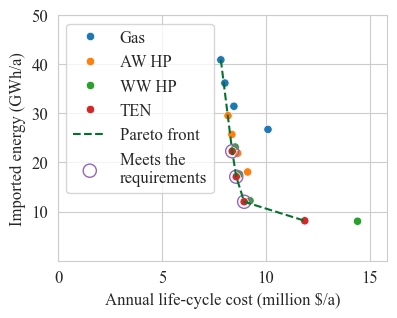

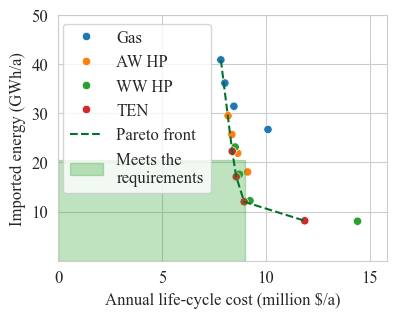

In [ ]:
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

folder_ini = rf'...\{current_sim}' # Hard link to the simulation folder

folders_temp = [name for name in os.listdir(folder_ini) if os.path.isdir(os.path.join(folder_ini, name))]
variantes = ['gas', 'a2w', 'w2w', 'ets']
folders = []
for k in variantes:
    for j in folders_temp:
        if k in j:
            folders.append(j)

names = {'gas': 'Gas', 'a2w': 'AW HP', 'w2w': 'WW HP', 'ets':'TEN'}

tot = pd.DataFrame()
for f in folders:
    files = os.listdir(os.path.join(folder_ini, f))
    file = [j for j in files if 'Summary' in j][0]
    eimp = pd.read_excel(os.path.join(folder_ini, f, file), sheet_name='Imports')
    eimp = eimp[eimp['Name'].isin(['Gas', 'Electricity'])]
    eimp = eimp.groupby('Solution').sum(numeric_only=True)[['Imported energy (kWh/year)']]
    summ = pd.read_excel(os.path.join(folder_ini, f, file), sheet_name='Key Results').groupby('Solution').sum(numeric_only=True)[['Annualized life-cycle cost (USD/year)']]
    sumt = pd.read_excel(os.path.join(folder_ini, f, file), sheet_name='Key Results').groupby('Solution').sum(numeric_only=True)[['Life-cycle cost (USD)']]
    res = pd.concat([eimp, summ, sumt], axis=1)
    res['scenario'] = names[f.split('-')[1].split('_')[0]]
    tot = pd.concat([tot, res])


tot = tot.reset_index()
tot.index = tot['scenario'] + ' - ' + tot['Solution']
tot['Imported energy (kWh/year)'] = tot['Imported energy (kWh/year)'] / 1000000
tot['Annualized life-cycle cost (USD/year)'] = tot['Annualized life-cycle cost (USD/year)'] / 1000000
tot['Life-cycle cost (USD)'] = tot['Life-cycle cost (USD)'] / 1000000

# pareto_front = tot[tot.index.isin(['Gas - Solution 1',
#                                     'AW HP - Solution 1',
#                                     'TEN - Solution 2',
#                                     'TEN - Solution 3',
#                                     'TEN - Solution 4'])]

pareto_front = tot[tot.index.isin(['Gas - Solution 1',
                                   'TEN - Solution 1',
                                   'TEN - Solution 2',
                                   'TEN - Solution 3',
                                   'TEN - Solution 4'])]

sols_pareto = tot[tot.index.isin(['TEN - Solution 1',
                                  'TEN - Solution 2',
                                  'TEN - Solution 3'])]

baseline_import = tot.loc['Gas - Solution 1', 'Imported energy (kWh/year)']
baseline_alcc = tot.loc['Gas - Solution 1', 'Annualized life-cycle cost (USD/year)']
baseline_lcc = tot.loc['Gas - Solution 1', 'Life-cycle cost (USD)']

plt.figure(figsize=((8.5)/ 2 , (8.5)/ 2 * 3 / 4))
sns.scatterplot(data = tot, x = 'Annualized life-cycle cost (USD/year)', y = 'Imported energy (kWh/year)', hue = 'scenario')
plt.plot(pareto_front['Annualized life-cycle cost (USD/year)'], pareto_front['Imported energy (kWh/year)'], linestyle='dashed', color = sns.color_palette("Greens")[5], label = 'Pareto front')
# plt.fill_between([baseline_alcc, baseline_alcc * (1 + 0.110686689), baseline_alcc * 1.25], [baseline_import * .6, baseline_import * .6, baseline_import -21.37684516 * baseline_alcc * 0.25], [0, 0, 0], alpha = 0.3, label = 'Meets the\nrequirements')
import_limit = tot.loc['Gas - Solution 1', 'Imported energy (kWh/year)'] * 0.5
alcc_limit = tot.loc['Gas - Solution 1', 'Annualized life-cycle cost (USD/year)'] * 1.15
plt.fill_between([0, alcc_limit], [import_limit,import_limit], [0,0], alpha = 0.3, label = 'Meets the\nrequirements', color = sns.color_palette()[2])

plt.xlim(0, max(tot['Annualized life-cycle cost (USD/year)'] * 1.1))  # Adding some padding for better visualization
plt.ylim(0, max(tot['Imported energy (kWh/year)'] * 1.1))
plt.xlabel('Annual life-cycle cost (million $/a)')
plt.ylabel('Imported energy (GWh/a)')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.gca().set_yticks(plt.gca().get_yticks()[1:])
# plt.legend(loc='center right', bbox_to_anchor=(1.55, 0.5))
plt.legend(loc='upper left', bbox_to_anchor=(-0.01, 1))
plt.savefig(r'img/pareto_requirements_fill.pdf', bbox_inches='tight')
plt.show()

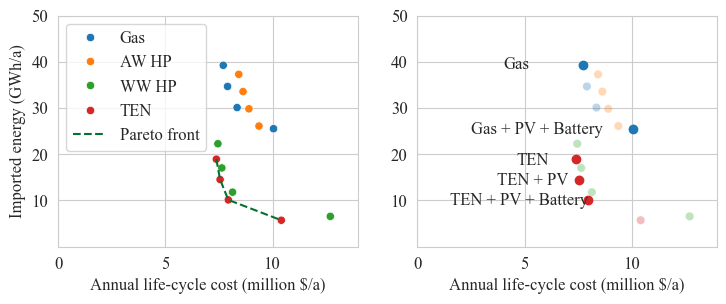

In [ ]:
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

folder_ini = rf'...\{current_sim}' # Hard link to the simulation folder

folders_temp = [name for name in os.listdir(folder_ini) if os.path.isdir(os.path.join(folder_ini, name))]
variantes = ['gas', 'a2w', 'w2w', 'ets']
folders = []
for k in variantes:
    for j in folders_temp:
        if k in j:
            folders.append(j)

names = {'gas': 'Gas', 'a2w': 'AW HP', 'w2w': 'WW HP', 'ets':'TEN'}

selection = {'Gas - Solution 1':'Gas',
             'Gas - Solution 4':'Gas + PV + Battery',
             'TEN - Solution 1':'TEN',
             'TEN - Solution 2':'TEN + PV',
             'TEN - Solution 3':'TEN + PV + Battery'}
colors_pareto = {'Gas - Solution 1':0,
                 'Gas - Solution 4':0,
                 'TEN - Solution 1':3,
                 'TEN - Solution 2':3,
                 'TEN - Solution 3':3}

tot = pd.DataFrame()
for f in folders:
    files = os.listdir(os.path.join(folder_ini, f))
    file = [j for j in files if 'Summary' in j][0]
    eimp = pd.read_excel(os.path.join(folder_ini, f, file), sheet_name='Imports').groupby('Solution').sum(numeric_only=True)[['Imported energy (kWh/year)']]
    summ = pd.read_excel(os.path.join(folder_ini, f, file), sheet_name='Key Results').groupby('Solution').sum(numeric_only=True)[['Annualized life-cycle cost (USD/year)']]
    res = pd.concat([eimp, summ], axis=1)
    res['scenario'] = names[f.split('-')[1].split('_')[0]]
    tot = pd.concat([tot, res])


tot = tot.reset_index()
tot.index = tot['scenario'] + ' - ' + tot['Solution']
tot['Imported energy (kWh/year)'] = tot['Imported energy (kWh/year)'] / 1000000
tot['Annualized life-cycle cost (USD/year)'] = tot['Annualized life-cycle cost (USD/year)'] / 1000000

# pareto_front = tot[tot.index.isin(['Gas - Solution 1',
#                                     'AW HP - Solution 1',
#                                     'TEN - Solution 2',
#                                     'TEN - Solution 3',
#                                     'TEN - Solution 4'])]

pareto_front = tot[tot.index.isin(['TEN - Solution 1',
                                   'TEN - Solution 2',
                                   'TEN - Solution 3',
                                   'TEN - Solution 4'])]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8.5, 3))
sns.scatterplot(data = tot, x = 'Annualized life-cycle cost (USD/year)', y = 'Imported energy (kWh/year)', hue = 'scenario', ax = ax1)
ax1.plot(pareto_front['Annualized life-cycle cost (USD/year)'], pareto_front['Imported energy (kWh/year)'], linestyle='dashed', color = sns.color_palette("Greens")[5], label = 'Pareto front')
ax1.set_xlim(0, max(tot['Annualized life-cycle cost (USD/year)'] * 1.1))  # Adding some padding for better visualization
ax1.set_ylim(0, max(tot['Imported energy (kWh/year)'] * 1.1))
ax1.set_xlabel('Annual life-cycle cost (million $/a)')
ax1.set_ylabel('Imported energy (GWh/a)')
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax1.set_yticks(ax1.get_yticks()[1:])
ax1.legend(loc='upper left')

tot_selec = tot[tot.index.isin(selection.keys())]

sns.scatterplot(data = tot, x = 'Annualized life-cycle cost (USD/year)', y = 'Imported energy (kWh/year)', hue = 'scenario', alpha = 0.3, ax = ax2)
for k in tot_selec.index:
    ax2.scatter(tot_selec.loc[k, 'Annualized life-cycle cost (USD/year)'], tot_selec.loc[k, 'Imported energy (kWh/year)'], color = sns.color_palette('tab10')[colors_pareto[k]])
ax2.set_xlim(0, max(tot['Annualized life-cycle cost (USD/year)'] * 1.1))  # Adding some padding for better visualization
ax2.set_ylim(0, max(tot['Imported energy (kWh/year)'] * 1.1))
ax2.set_xlabel('Annual life-cycle cost (million $/a)')
ax2.set_ylabel(None)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.set_yticks(ax2.get_yticks()[1:])
ax2.get_legend().set_visible(False)
ax2.text(4, tot.loc['Gas - Solution 1', 'Imported energy (kWh/year)'] - 0.7, 'Gas')
ax2.text(2.5, tot.loc['Gas - Solution 4', 'Imported energy (kWh/year)'] - 1, 'Gas + PV + Battery')
ax2.text(4.6, tot.loc['TEN - Solution 1', 'Imported energy (kWh/year)'] - 1.1, 'TEN')
ax2.text(3.7, tot.loc['TEN - Solution 2', 'Imported energy (kWh/year)'] - 1.1, 'TEN + PV')
ax2.text(1.5, tot.loc['TEN - Solution 3', 'Imported energy (kWh/year)'] - 1, 'TEN + PV + Battery')
plt.savefig(r'img/pareto_combi.pdf', bbox_inches='tight')
plt.show()


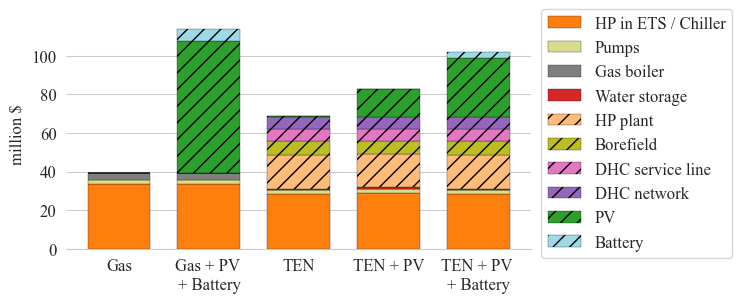

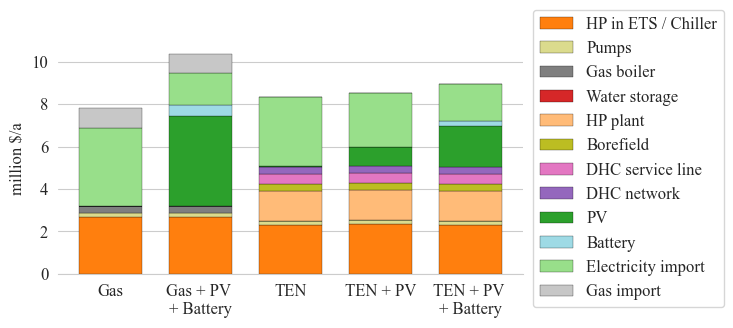

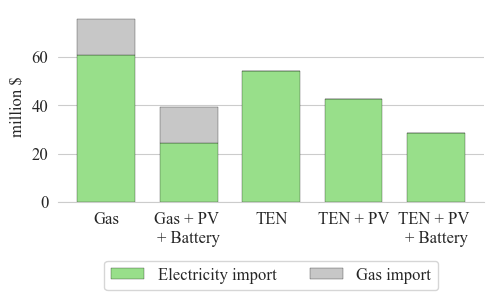

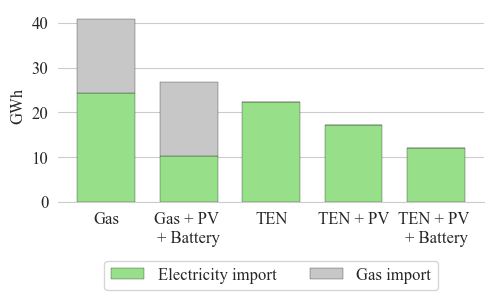

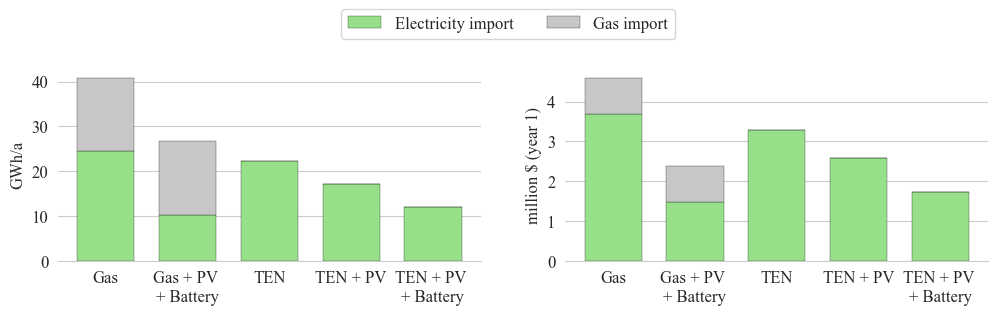

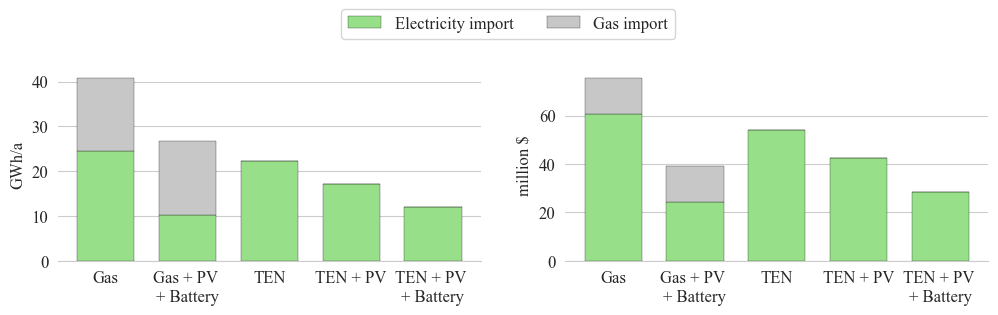

In [ ]:
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

folder_ini = rf'...\{current_sim}' # Hard link to the simulation folder
files = {'Gas - Solution 1':r'pump-gas_multi\Solution 1-pump-gas_multi.xlsx',
         'Gas - Solution 4':r'pump-gas_multi\Solution 4-pump-gas_multi.xlsx',
         'TEN - Solution 1':r'pump-ets_simple\Solution 1-pump-ets_simple.xlsx',
         'TEN - Solution 2':r'pump-ets_simple\Solution 2-pump-ets_simple.xlsx',
         'TEN - Solution 3':r'pump-ets_simple\Solution 3-pump-ets_simple.xlsx'}

selection = {'Gas - Solution 1':'Gas',
             'Gas - Solution 4':'Gas + PV \n+ Battery',
             'TEN - Solution 1':'TEN',
             'TEN - Solution 2':'TEN + PV',
             'TEN - Solution 3':'TEN + PV \n+ Battery'}

res = pd.DataFrame()
for f in files:
    lect = pd.read_excel(os.path.join(folder_ini, files[f]), sheet_name='Cost & CO2')
    lect['Solution'] = selection[f]
    res = pd.concat([res, lect])

res = res[res['Type'].isin(['Conversion', 'Storage', 'Network', 'Import', 'Export'])]
res = res[res['Type'].isin(['Conversion', 'Storage', 'Network', 'Import'])]


replace_names = {'A2W HP':'HP in ETS / Chiller', 
                 'ETS HP':'HP in ETS / Chiller', 
                 'local W2WHP': 'HP in ETS / Chiller',
                 'chiller': 'HP in ETS / Chiller',
                 'Gas Boiler (Linearized cost)':'Gas boiler',
                 'Generic Borehole':'Borefield', 
                 'Generic Hot Water Storage':'Water storage', 
                 'HEX ETS':'Grid connection',
                 'HEX pump ETS':'DHC service line',
                 'Individual Borehole':'Borefield', 
                 'Main HP':'HP plant', 
                 'Pump DHW':'Pumps', 
                 'Pump DHW gas':'Pumps', 
                 'Pump SH':'Pumps', 'Pump cooling': 'Pumps', 
                 'cooling_tower': 'Cooling tower', 
                 'cooling tower a2w': 'Cooling tower',
                 'cooling tower plant': 'Cooling tower', 
                 'cooling tower w2w': 'Cooling tower',
                 'cooling tower chiller': 'Cooling tower',
                 'Anergy':'DHC network',
                 'parking to pv': 'PV',
                 'rooftop to pv': 'PV',
                 'battery': 'Battery',
                 'Electricity': 'Electricity import',
                 'Gas': 'Gas import'}

colors= {'Borefield':16, 'Cooling tower':0, 'Gas boiler':14, 
         'DHC service line':12, 'HP in ETS / Chiller':2, 'HP plant':3, 'DHC network':8, 
         'Pumps':17, 'Water storage':6, 'Electricity import':5, 'Gas import':15, 
         'PV': 4, 'Battery': 19}

rank= {'Borefield':6, 'Cooling tower':2, 'Gas boiler':3, 
         'DHC service line':7, 'HP in ETS / Chiller':0, 'HP plant':5, 'DHC network':8, 
         'Pumps':1, 'Water storage':4, 'Electricity import':11, 'Gas import':12,
         'PV': 9, 'Battery': 10}

network = ['Borefield', 'DHC service line', 'HP plant', 'DHC network', 'Battery', 'PV']

res['Name'] = res['Name'].apply(lambda x: 'Generic Hot Water Storage' if 'Generic Hot Water Storage' in x else x)
res['Name'] = res['Name'].apply(lambda x: 'Individual Borehole' if 'Individual Borehole' in x else x)
res['Name'] = res['Name'].replace(replace_names)

res_avg = res.groupby(['Stage', 'Name', 'Type', 'Solution'], as_index= False).mean(numeric_only=True)
res_max = res.groupby(['Stage', 'Name', 'Type', 'Solution'], as_index= False).max(numeric_only=True)
res = res.groupby(['Stage', 'Name', 'Type', 'Solution'], as_index= False).sum()

usd = {'Investment (USD)': 'Investment_costs', 
        'Annualized life-cycle cost (USD/year)': 'Life-cycle_cost', 
        'Imports cost (USD)': 'Import_energy_cost',
        'Energy in (kWh/year)': 'Energy_imports'}
# usd = {'Investment (USD)': 'Investment costs'}

pos_leg = {'Investment (USD)': -0.55, 
        'Annualized life-cycle cost (USD/year)': -0.55,
        'Imports cost (USD)': -0.3,
        'Energy in (kWh/year)':-0.3}

for i in usd:    
    temp = res[(res[i] > 0)]
    if i == 'Energy in (kWh/year)':
        temp = temp[(temp['Type'] == 'Import') & (temp['Name'].isin(['Electricity import', 'Gas import']))]
    piv = temp.pivot(columns=['Solution'], index = 'Name', values= i)
    piv = piv[list(selection.values())]
    piv['pos_grid'] = piv.index.to_series().map(rank)
    piv = piv.sort_values(['pos_grid']).drop(columns = ['pos_grid'])
    # piv.columns = piv.columns.str.upper()
    piv = piv.fillna(0)
    piv = piv / 1000000
    pivb = piv.cumsum()

    if i in['Investment (USD)', 'Annualized life-cycle cost (USD/year)']:
        plt.figure(figsize=(6, 3))
    else:
        plt.figure(figsize=(5.5, 2.5))
    for j, k in enumerate(piv.index):
        if j == 0:
            plt.bar(piv.columns, piv.loc[k, :],  edgecolor = 'black', linewidth=0.2, 
                    color=sns.color_palette("tab20")[colors[k]], width=0.7, label = k)
        else:
            if k in network and i == 'Investment (USD)':
                plt.bar(piv.columns, piv.loc[k, :], bottom = pivb.loc[old, :], 
                    edgecolor = 'black', linewidth=0.2, hatch='//',
                    color=sns.color_palette("tab20")[colors[k]], width=0.7, label = k)
            else:
                plt.bar(piv.columns, piv.loc[k, :], bottom = pivb.loc[old, :], 
                        edgecolor = 'black', linewidth=0.2, 
                        color=sns.color_palette("tab20")[colors[k]], width=0.7, label = k)
        old = k

    if i in['Investment (USD)', 'Annualized life-cycle cost (USD/year)']:
        plt.legend(loc='center right', bbox_to_anchor=(1.45, 0.5), ncol=1)
    else:
        plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=2)
    sns.despine(left=True)
    plt.gca().xaxis.grid(False)
    if i == 'Energy in (kWh/year)':
        plt.ylabel('GWh')
    elif i == 'Annualized life-cycle cost (USD/year)':
        plt.ylabel('million $/a')
    else:
        plt.ylabel('million $')
    plt.savefig(rf'img/{usd[i]}.pdf', bbox_inches='tight')
    plt.show()


# Common figure (energy import)

fig, ax = plt.subplots(1, 2, figsize=(12, 2.5))
for n, i in enumerate(['Energy in (kWh/year)', 'Annualized life-cycle cost (USD/year)']):
    temp = res[(res[i] > 0)]
    temp = temp[(temp['Type'] == 'Import') & (temp['Name'].isin(['Electricity import', 'Gas import']))]
    piv = temp.pivot(columns=['Solution'], index = 'Name', values= i)
    piv = piv[list(selection.values())]
    piv['pos_grid'] = piv.index.to_series().map(rank)
    piv = piv.sort_values(['pos_grid']).drop(columns = ['pos_grid'])
    # piv.columns = piv.columns.str.upper()
    piv = piv.fillna(0)
    piv = piv / 1000000
    pivb = piv.cumsum()

    for j, k in enumerate(piv.index):
        if j == 0:
            ax[n].bar(piv.columns, piv.loc[k, :],  edgecolor = 'black', linewidth=0.2, 
                    color=sns.color_palette("tab20")[colors[k]], width=0.7, label = k)
        else:
            if k in network:
                ax[n].bar(piv.columns, piv.loc[k, :], bottom = pivb.loc[old, :], 
                    edgecolor = 'black', linewidth=0.2, hatch='//',
                    color=sns.color_palette("tab20")[colors[k]], width=0.7, label = k)
            else:
                ax[n].bar(piv.columns, piv.loc[k, :], bottom = pivb.loc[old, :], 
                        edgecolor = 'black', linewidth=0.2, color=sns.color_palette("tab20")[colors[k]], width=0.7, label = k)
        old = k

    sns.despine(left=True)
    ax[n].xaxis.grid(False)
    if i == 'Energy in (kWh/year)':
        ax[n].set_ylabel('GWh/a')
    else:
        ax[n].set_ylabel('million $ (year 1)')
    
handles, labels = ax[n].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.savefig(rf'img/combi_energy.pdf', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 2.5))
for n, i in enumerate(['Energy in (kWh/year)', 'Imports cost (USD)']):
    temp = res[(res[i] > 0)]
    temp = temp[(temp['Type'] == 'Import') & (temp['Name'].isin(['Electricity import', 'Gas import']))]
    piv = temp.pivot(columns=['Solution'], index = 'Name', values= i)
    piv = piv[list(selection.values())]
    piv['pos_grid'] = piv.index.to_series().map(rank)
    piv = piv.sort_values(['pos_grid']).drop(columns = ['pos_grid'])
    # piv.columns = piv.columns.str.upper()
    piv = piv.fillna(0)
    piv = piv / 1000000
    pivb = piv.cumsum()

    for j, k in enumerate(piv.index):
        if j == 0:
            ax[n].bar(piv.columns, piv.loc[k, :],  edgecolor = 'black', linewidth=0.2, 
                    color=sns.color_palette("tab20")[colors[k]], width=0.7, label = k)
        else:
            if k in network:
                ax[n].bar(piv.columns, piv.loc[k, :], bottom = pivb.loc[old, :], 
                    edgecolor = 'black', linewidth=0.2, hatch='//',
                    color=sns.color_palette("tab20")[colors[k]], width=0.7, label = k)
            else:
                ax[n].bar(piv.columns, piv.loc[k, :], bottom = pivb.loc[old, :], 
                        edgecolor = 'black', linewidth=0.2, color=sns.color_palette("tab20")[colors[k]], width=0.7, label = k)
        old = k

    sns.despine(left=True)
    ax[n].xaxis.grid(False)
    if i == 'Energy in (kWh/year)':
        ax[n].set_ylabel('GWh/a')
    else:
        ax[n].set_ylabel('million $')
    
handles, labels = ax[n].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.savefig(rf'img/combi_energy_lifetime.pdf', bbox_inches='tight')
plt.show()

C:\Users\remi\AppData\Local\Temp\ipykernel_14992\2890378477.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['label'] = temp['Solution'].apply(lambda x: x.replace('_pv', ''))


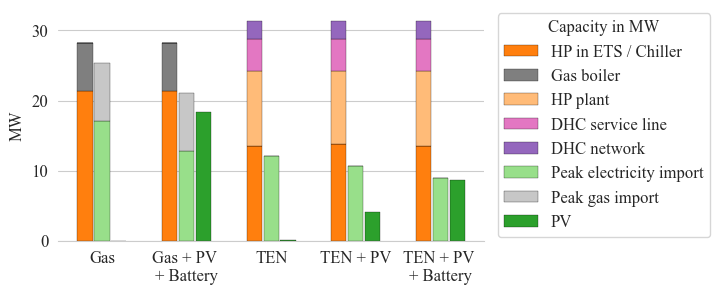

In [ ]:
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

folder_ini = rf'...\{current_sim}' # Hard link to the simulation folder
files = {'Gas - Solution 1':r'pump-gas_multi\Solution 1-pump-gas_multi.xlsx',
         'Gas - Solution 4':r'pump-gas_multi\Solution 4-pump-gas_multi.xlsx',
         'TEN - Solution 1':r'pump-ets_simple\Solution 1-pump-ets_simple.xlsx',
         'TEN - Solution 2':r'pump-ets_simple\Solution 2-pump-ets_simple.xlsx',
         'TEN - Solution 3':r'pump-ets_simple\Solution 3-pump-ets_simple.xlsx'}

selection = {'Gas - Solution 1':'Gas',
             'Gas - Solution 4':'Gas + PV \n+ Battery',
             'TEN - Solution 1':'TEN',
             'TEN - Solution 2':'TEN + PV',
             'TEN - Solution 3':'TEN + PV \n+ Battery'}

res = pd.DataFrame()
for f in files:
    sheets = pd.ExcelFile(os.path.join(folder_ini, files[f])).sheet_names
    lect = pd.read_excel(os.path.join(folder_ini, files[f]), sheet_name='Cost & CO2')
    imp = pd.read_excel(os.path.join(folder_ini, files[f]), sheet_name='Imports')
    imp = imp[imp['Name'].isin(['Electricity', 'Gas'])]
    imp = imp[pd.notna(imp['Operational data sheet'])]
    imp['Operational data sheet'] = imp['Operational data sheet'].apply(lambda x: x.split('!')[0].replace("'", ''))
    for k in imp.index:
        if imp.loc[k, 'Operational data sheet'] in sheets:
            temp = pd.read_excel(os.path.join(folder_ini, files[f]), 
                                 sheet_name = imp.loc[k, 'Operational data sheet'],
                                 skiprows=1)
            lect.loc[lect[(lect['Name'] == imp.loc[k, 'Name']) & (lect['Hub or Link'] == imp.loc[k, 'Hub'])].index[0], 'Capacity (kW or KWh)'] = temp['Capacity (kW)'].max()
    
    net = pd.read_excel(os.path.join(folder_ini, files[f]), sheet_name='Networks')
    net = net[net['Name'].isin(['Anergy'])]
    net = net[pd.notna(net['Operational data sheet'])]
    net['Operational data sheet'] = net['Operational data sheet'].apply(lambda x: x.split('!')[0].replace("'", ''))
    for k in net.index:
        if net.loc[k, 'Operational data sheet'] in sheets:
            temp = pd.read_excel(os.path.join(folder_ini, files[f]), 
                                 sheet_name = net.loc[k, 'Operational data sheet'],
                                 skiprows=1)
            lect.loc[lect[(lect['Name'] == net.loc[k, 'Name']) & (lect['Hub or Link'] == net.loc[k, 'Link'])].index[0], 'Capacity (kW or KWh)'] = temp['Capacity (kW)'].max()
    lect['Solution'] = selection[f]
    res = pd.concat([res, lect])

res = res[res['Type'].isin(['Conversion', 'Storage', 'Network', 'Import', 'Export'])]
res = res[res['Type'].isin(['Conversion', 'Storage', 'Network', 'Import'])]


replace_names = {'A2W HP':'HP in ETS / Chiller', 
                 'ETS HP':'HP in ETS / Chiller', 
                 'local W2WHP': 'HP in ETS / Chiller',
                 'chiller': 'HP in ETS / Chiller',
                 'Gas Boiler (Linearized cost)':'Gas boiler',
                 'Generic Borehole':'Borefield', 
                 'Generic Hot Water Storage':'Water storage', 
                 'HEX ETS':'Grid connection',
                 'HEX pump ETS':'DHC service line',
                 'Individual Borehole':'Borefield', 
                 'Main HP':'HP plant', 
                 'Pump DHW':'Pumps', 
                 'Pump DHW gas':'Pumps', 
                 'Pump SH':'Pumps', 'Pump cooling': 'Pumps', 
                 'cooling_tower': 'Cooling tower', 
                 'cooling tower a2w': 'Cooling tower',
                 'cooling tower plant': 'Cooling tower', 
                 'cooling tower w2w': 'Cooling tower',
                 'cooling tower chiller': 'Cooling tower',
                 'Anergy':'DHC network',
                 'parking to pv': 'PV',
                 'rooftop to pv': 'PV',
                 'battery': 'Battery',
                 'Electricity': 'Electricity import',
                 'Gas': 'Gas import'}

colors= {'Borefield':16, 'Cooling tower':0, 'Gas boiler':14, 
         'DHC service line':12, 'HP in ETS / Chiller':2, 'HP plant':3, 'DHC network':8, 
         'Pumps':17, 'Water storage':6, 'Electricity import':5, 'Gas import':15, 
         'PV': 4, 'Battery': 19}

rank= {'Borefield':6, 'Cooling tower':2, 'Gas boiler':3, 
         'DHC service line':7, 'HP in ETS / Chiller':0, 'HP plant':5, 'DHC network':8, 
         'Pumps':1, 'Water storage':4, 'Electricity import':11, 'Gas import':12,
         'PV': 9, 'Battery': 10}

network = ['Borefield', 'DHC service line', 'HP plant', 'DHC network', 'Battery', 'PV']

res['Name'] = res['Name'].apply(lambda x: 'Generic Hot Water Storage' if 'Generic Hot Water Storage' in x else x)
res['Name'] = res['Name'].apply(lambda x: 'Individual Borehole' if 'Individual Borehole' in x else x)
res['Name'] = res['Name'].replace(replace_names)

res_avg = res.groupby(['Stage', 'Name', 'Type', 'Solution'], as_index= False).mean(numeric_only=True)
res_max = res.groupby(['Stage', 'Name', 'Type', 'Solution'], as_index= False).max(numeric_only=True)
res = res.groupby(['Stage', 'Name', 'Type', 'Solution'], as_index= False).sum()



temp = res[(res['Capacity (kW or KWh)'] > 0) & (res['Life-cycle cost (USD)'] > 0)]
temp['label'] = temp['Solution'].apply(lambda x: x.replace('_pv', ''))
temp.loc[(temp['Name'] == 'DHC network'), 'Capacity (kW or KWh)'] = res_avg.loc[(res_avg['Name'] == 'DHC network'), 'Capacity (kW or KWh)']
source_temp = np.arange(5)

names_legend = {'HP in ETS / Chiller':'HP in ETS / Chiller', 
                 'Gas boiler':'Gas boiler',
                 'Borefield':'Borefield', 
                 'Water storage':'Water storage', 
                 'Grid connection':'Grid connection',
                 'DHC service line':'DHC service line',
                 'HP plant':'HP plant', 
                 'Pumps':'Pumps',
                 'Cooling tower': 'Cooling tower', 
                 'DHC network':'DHC network',
                 'PV': 'PV',
                 'Battery': 'Battery',
                 'Electricity import': 'Peak electricity import',
                 'Gas import': 'Peak gas import'}

temp.loc[temp['Name'] == 'PV', 'Type'] = 'Production'

choice = [['Conversion', 'Export', 'Network'], ['Import'], ['Production']]

width = 0.18
fig, ax1 = plt.subplots(figsize=(5.5,3))
compt = -0.2
for h, g in enumerate(choice):
    tempb = temp[temp['Type'].isin(g)]
    tempb = tempb[~tempb['Name'].isin(['Pumps'])]
    piv = tempb.pivot(columns=['Solution'], index = 'Name', values= 'Capacity (kW or KWh)')
    for missing in list(selection.values()):
        if missing not in piv.columns:
            piv[missing] = 0
    piv = piv[list(selection.values())]
    piv['pos_grid'] = piv.index.to_series().map(rank)
    piv = piv.sort_values(['pos_grid']).drop(columns = ['pos_grid'])
    # piv.columns = piv.columns.str.upper()
    piv = piv.fillna(0)
    piv = piv / 1000

    pivb = piv.cumsum()
    for j, k in enumerate(piv.index):
        if j == 0:
            ax1.bar(source_temp + compt, piv.loc[k, :],  edgecolor = 'black', linewidth=0.2, 
                    width = width, 
                    color=sns.color_palette("tab20")[colors[k]], label = names_legend[k])
        else:
            ax1.bar(source_temp + compt, piv.loc[k, :], bottom = pivb.loc[old, :], 
                    width = width, 
                    edgecolor = 'black', linewidth=0.2, color=sns.color_palette("tab20")[colors[k]], label = names_legend[k])
        old = k
    compt = compt + 0.2
    

ax1.legend(loc='center right', bbox_to_anchor=(1.55, 0.5), title='Capacity in MW')
sns.despine(left=True)
ax1.xaxis.grid(False)
ax1.set_ylabel('MW')
plt.xticks(source_temp, piv.columns)
plt.savefig(r'img/capacity_variant.pdf', bbox_inches='tight')
plt.show()

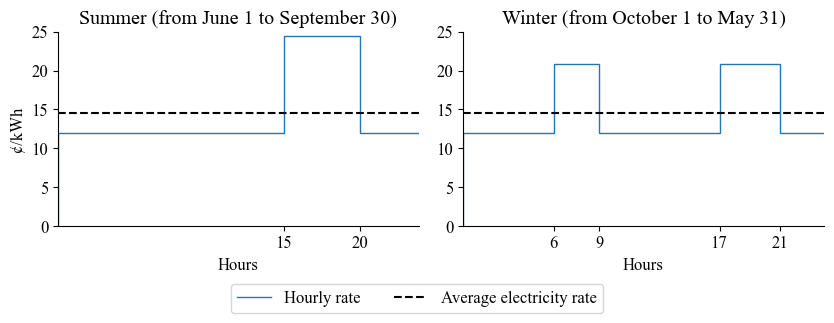

In [ ]:
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

reference = {'Low rates': 12, 'High rates summer': 24.5, 'High rates winter': 20.9}

df = pd.DataFrame({'time': np.linspace(0, 23, 24)})
df['summer'] = df['time'].apply(lambda x: reference['High rates summer'] if ((x >= 15) & (x <= 19)) else reference['Low rates'])
df['winter'] = df['time'].apply(lambda x: reference['High rates winter'] if ((x >= 6) & (x <= 8)) | ((x >= 17) & (x <= 20)) else reference['Low rates'])


x = np.linspace(0, 24, 25)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8.5, 3))
ax1.stairs(df['summer'], label = 'Hourly rate')
ax1.plot(x, 14.6 * np.ones(len(x)), linestyle='dashed', color='black', label='Average electricity rate')
ax1.set_xlabel('Hours')
ax1.set_ylabel('¢/kWh')
ax1.margins(x = 0)
ax1.set_xlim(0,23.9)
ax1.set_ylim(bottom=0, top=25)
ax1.set_xticks([15, 20])
ax1.spines[['right', 'top']].set_visible(False)
ax1.set_title('Summer (from June 1 to September 30)')

ax2.stairs(df['winter'])
ax2.plot(x, 14.6 * np.ones(len(x)), linestyle='dashed', color='black')
ax2.set_xlabel('Hours')
ax2.margins(x = 0)
ax2.set_xlim(0,23.9)
ax2.set_ylim(bottom=0, top=25)
ax2.set_xticks([6, 9, 17, 21])
ax2.spines[['right', 'top']].set_visible(False)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.set_title('Winter (from October 1 to May 31)')
fig.legend(h1+h2, l1+l2, ncols=4, loc='lower center', bbox_to_anchor=(0.5, -0.1))
fig.tight_layout()
plt.savefig(r'img/prices_rates_variante.pdf', bbox_inches='tight')
plt.show()

In [ ]:
params = {'api_key': ""} #API key

url = "https://api.eia.gov/v2/aeo/2023/data/?frequency=annual&data[0]=value&facets[scenario][]=aeo2022ref&facets[scenario][]=highZTC&facets[scenario][]=highmachighZTC&facets[scenario][]=highmaclowZTC&facets[scenario][]=highmacro&facets[scenario][]=highogs&facets[scenario][]=highprice&facets[scenario][]=highupIRA&facets[scenario][]=lng_hp&facets[scenario][]=lng_hp_fast&facets[scenario][]=lng_lp&facets[scenario][]=lowZTC&facets[scenario][]=lowmachighZTC&facets[scenario][]=lowmaclowZTC&facets[scenario][]=lowmacro&facets[scenario][]=lowogs&facets[scenario][]=lowprice&facets[scenario][]=lowupIRA&facets[scenario][]=noIRA&facets[scenario][]=ref2023&facets[seriesId][]=prce_nom_comm_NA_elc_NA_enc_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_elc_NA_esc_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_elc_NA_mdatl_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_elc_NA_mtn_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_elc_NA_neengl_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_elc_NA_pcf_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_elc_NA_soatl_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_elc_NA_wnc_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_elc_NA_wsc_ndlrpmbtu&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"
response = requests.get(url, params=params)
elec_reg = pd.DataFrame(response.json()['response']['data'])

url = "https://api.eia.gov/v2/aeo/2023/data/?frequency=annual&data[0]=value&facets[scenario][]=aeo2022ref&facets[scenario][]=highZTC&facets[scenario][]=highmachighZTC&facets[scenario][]=highmaclowZTC&facets[scenario][]=highmacro&facets[scenario][]=highogs&facets[scenario][]=highprice&facets[scenario][]=highupIRA&facets[scenario][]=lng_hp&facets[scenario][]=lng_hp_fast&facets[scenario][]=lng_lp&facets[scenario][]=lowZTC&facets[scenario][]=lowmachighZTC&facets[scenario][]=lowmaclowZTC&facets[scenario][]=lowmacro&facets[scenario][]=lowogs&facets[scenario][]=lowprice&facets[scenario][]=lowupIRA&facets[scenario][]=noIRA&facets[scenario][]=ref2023&facets[seriesId][]=prce_nom_comm_NA_elc_NA_NA_ndlrpmbtu&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"
response = requests.get(url, params=params)
elec_us = pd.DataFrame(response.json()['response']['data'])

elec = pd.concat([elec_reg, elec_us])
elec = elec[elec['regionName'] == 'South Atlantic']
elec['period'] = elec['period'].astype(int)
elec['value'] = elec['value'].astype(float)
elec = elec.sort_values(['period', 'value'], ascending=False).reset_index(drop=True)
elec = elec[elec['period'] >= 2022]
elec_min = elec.drop_duplicates('period', keep = 'first')
elec_max = elec.drop_duplicates('period', keep = 'last')


url = "https://api.eia.gov/v2/aeo/2023/data/?frequency=annual&data[0]=value&facets[scenario][]=aeo2022ref&facets[scenario][]=highZTC&facets[scenario][]=highmachighZTC&facets[scenario][]=highmaclowZTC&facets[scenario][]=highmacro&facets[scenario][]=highogs&facets[scenario][]=highprice&facets[scenario][]=highupIRA&facets[scenario][]=lng_hp&facets[scenario][]=lng_hp_fast&facets[scenario][]=lng_lp&facets[scenario][]=lowZTC&facets[scenario][]=lowmachighZTC&facets[scenario][]=lowmaclowZTC&facets[scenario][]=lowmacro&facets[scenario][]=lowogs&facets[scenario][]=lowprice&facets[scenario][]=lowupIRA&facets[scenario][]=noIRA&facets[scenario][]=ref2023&facets[seriesId][]=prce_nom_comm_NA_ng_NA_enc_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_ng_NA_esc_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_ng_NA_mdatl_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_ng_NA_mtn_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_ng_NA_neengl_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_ng_NA_pcf_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_ng_NA_soatl_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_ng_NA_wnc_ndlrpmbtu&facets[seriesId][]=prce_nom_comm_NA_ng_NA_wsc_ndlrpmbtu&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"
response = requests.get(url, params=params)
gaz_reg = pd.DataFrame(response.json()['response']['data'])

url = "https://api.eia.gov/v2/aeo/2023/data/?frequency=annual&data[0]=value&facets[scenario][]=aeo2022ref&facets[scenario][]=highZTC&facets[scenario][]=highmachighZTC&facets[scenario][]=highmaclowZTC&facets[scenario][]=highmacro&facets[scenario][]=highogs&facets[scenario][]=highprice&facets[scenario][]=highupIRA&facets[scenario][]=lng_hp&facets[scenario][]=lng_hp_fast&facets[scenario][]=lng_lp&facets[scenario][]=lowZTC&facets[scenario][]=lowmachighZTC&facets[scenario][]=lowmaclowZTC&facets[scenario][]=lowmacro&facets[scenario][]=lowogs&facets[scenario][]=lowprice&facets[scenario][]=lowupIRA&facets[scenario][]=noIRA&facets[scenario][]=ref2023&facets[seriesId][]=prce_nom_comm_NA_ng_NA_NA_ndlrpmbtu&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000"
response = requests.get(url, params=params)
gaz_us = pd.DataFrame(response.json()['response']['data'])

gaz = pd.concat([gaz_reg, gaz_us])
gaz = gaz[gaz['regionName'] == 'South Atlantic']
gaz['period'] = gaz['period'].astype(int)
gaz['value'] = gaz['value'].astype(float)
gaz = gaz.sort_values(['period', 'value'], ascending=False).reset_index(drop=True)
gaz = gaz[gaz['period'] >= 2022]
gaz_min = gaz.drop_duplicates('period', keep = 'first')
gaz_max = gaz.drop_duplicates('period', keep = 'last')

Electricity: 14.597192810000001
Gas: 5.575387812400001


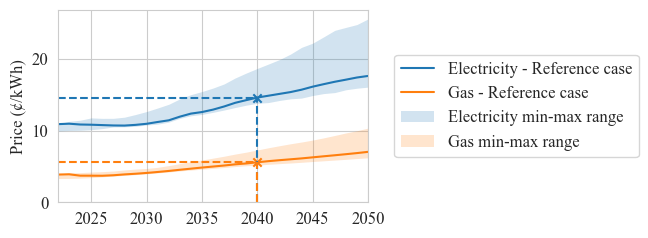

In [ ]:
convert = 100 / (1 / 3412 * 1000000)

sns.set_style('whitegrid')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

plt.figure(figsize=(4,2.5))
plt.plot(elec[(elec['scenario'] == 'ref2023') & (elec['regionName'] == 'South Atlantic')]['period'], 
         elec[(elec['scenario'] == 'ref2023') & (elec['regionName'] == 'South Atlantic')]['value'] * convert, label = 'Electricity - Reference case', color = sns.color_palette()[0])
plt.plot(gaz[(gaz['scenario'] == 'ref2023') & (gaz['regionName'] == 'South Atlantic')]['period'], 
         gaz[(gaz['scenario'] == 'ref2023') & (gaz['regionName'] == 'South Atlantic')]['value'] * convert, label = 'Gas - Reference case', color = sns.color_palette()[1])

plt.fill_between(elec_min['period'], elec_min['value'] * convert, elec_max['value'] * convert, alpha = 0.2, color = sns.color_palette()[0], linewidth=0, label = 'Electricity min-max range')
plt.fill_between(gaz_min['period'], gaz_min['value'] * convert, gaz_max['value'] * convert, alpha = 0.2, color = sns.color_palette()[1], linewidth=0, label = 'Gas min-max range')

val_40_e = elec[(elec['scenario'] == 'ref2023') & (elec['regionName'] == 'South Atlantic') & (elec['period'] == 2040)]['value'].values[0] * convert
plt.scatter(2040, val_40_e, marker = 'x', color = sns.color_palette()[0])
plt.vlines(2040, 0, val_40_e, color = sns.color_palette()[0], linestyles = 'dashed')
plt.hlines(val_40_e, 2022, 2040, color = sns.color_palette()[0], linestyles = 'dashed')
print(f'Electricity: {val_40_e}')

val_40_g = gaz[(gaz['scenario'] == 'ref2023') & (gaz['regionName'] == 'South Atlantic') & (gaz['period'] == 2040)]['value'].values[0] * convert
plt.scatter(2040, val_40_g, marker = 'x', color = sns.color_palette()[1])
plt.vlines(2040, 0, val_40_g, color = sns.color_palette()[1], linestyles = 'dashed')
plt.hlines(val_40_g, 2022, 2040, color = sns.color_palette()[1], linestyles = 'dashed')
# plt.text(2022 - 1, val_40_g, round(val_40_g,1), ha='center', va='center')
print(f'Gas: {val_40_g}')

plt.margins(x=0)
plt.ylabel('Price (¢/kWh)')
plt.legend(loc='center right', bbox_to_anchor=(1.9, 0.5))
plt.gca().set_ylim(bottom=0)
plt.savefig(r'img/elec_gas_nom.pdf', bbox_inches='tight')
plt.show()

C:\Users\remi\AppData\Local\Temp\ipykernel_3204\3519680565.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_40_e['value'] = val_40_e['value'] * convert
C:\Users\remi\AppData\Local\Temp\ipykernel_3204\3519680565.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_40_g['value'] = val_40_g['value'] * convert


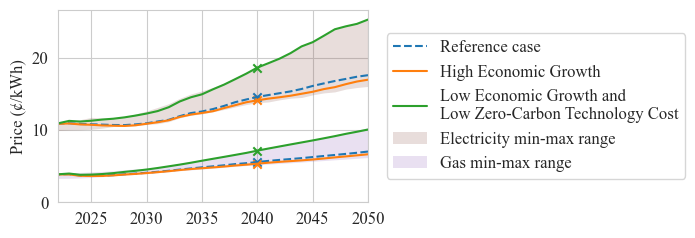

In [ ]:
convert = 100 / (1 / 3412 * 1000000)

sns.set_style('whitegrid')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

plt.figure(figsize=(4,2.5))

plt.plot(elec[(elec['scenario'] == 'ref2023') & (elec['regionName'] == 'South Atlantic')]['period'], 
         elec[(elec['scenario'] == 'ref2023') & (elec['regionName'] == 'South Atlantic')]['value'] * convert, label = 'Reference case', color = sns.color_palette()[0], linestyle='dashed')
plt.plot(gaz[(gaz['scenario'] == 'ref2023') & (gaz['regionName'] == 'South Atlantic')]['period'], 
         gaz[(gaz['scenario'] == 'ref2023') & (gaz['regionName'] == 'South Atlantic')]['value'] * convert, color = sns.color_palette()[0], linestyle='dashed')

plt.plot(elec[(elec['scenario'] == 'highmacro') & (elec['regionName'] == 'South Atlantic')]['period'], 
         elec[(elec['scenario'] == 'highmacro') & (elec['regionName'] == 'South Atlantic')]['value'] * convert, label = 'High Economic Growth', color = sns.color_palette()[1])
plt.plot(gaz[(gaz['scenario'] == 'highmacro') & (gaz['regionName'] == 'South Atlantic')]['period'], 
         gaz[(gaz['scenario'] == 'highmacro') & (gaz['regionName'] == 'South Atlantic')]['value'] * convert, color = sns.color_palette()[1])

plt.plot(elec[(elec['scenario'] == 'lowmaclowZTC') & (elec['regionName'] == 'South Atlantic')]['period'], 
         elec[(elec['scenario'] == 'lowmaclowZTC') & (elec['regionName'] == 'South Atlantic')]['value'] * convert, label = 'Low Economic Growth and\nLow Zero-Carbon Technology Cost', color = sns.color_palette()[2])
plt.plot(gaz[(gaz['scenario'] == 'lowmaclowZTC') & (gaz['regionName'] == 'South Atlantic')]['period'], 
         gaz[(gaz['scenario'] == 'lowmaclowZTC') & (gaz['regionName'] == 'South Atlantic')]['value'] * convert, color = sns.color_palette()[2])

plt.fill_between(elec_min['period'], elec_min['value'] * convert, elec_max['value'] * convert, alpha = 0.2, color = sns.color_palette()[5], linewidth=0, label = 'Electricity min-max range')
plt.fill_between(gaz_min['period'], gaz_min['value'] * convert, gaz_max['value'] * convert, alpha = 0.2, color = sns.color_palette()[4], linewidth=0, label = 'Gas min-max range')

val_40_e = elec[(elec['regionName'] == 'South Atlantic') & (elec['period'] == 2040)]
val_40_e['value'] = val_40_e['value'] * convert
plt.scatter(2040, val_40_e[val_40_e['scenario'] == 'ref2023']['value'].values[0], marker = 'x', color = sns.color_palette()[0])
plt.scatter(2040, val_40_e[val_40_e['scenario'] == 'highmacro']['value'].values[0], marker = 'x', color = sns.color_palette()[1])
plt.scatter(2040, val_40_e[val_40_e['scenario'] == 'lowmaclowZTC']['value'].values[0], marker = 'x', color = sns.color_palette()[2])

val_40_g = gaz[(gaz['regionName'] == 'South Atlantic') & (gaz['period'] == 2040)]
val_40_g['value'] = val_40_g['value'] * convert
plt.scatter(2040, val_40_g[val_40_g['scenario'] == 'ref2023']['value'].values[0], marker = 'x', color = sns.color_palette()[0])
plt.scatter(2040, val_40_g[val_40_g['scenario'] == 'highmacro']['value'].values[0], marker = 'x', color = sns.color_palette()[1])
plt.scatter(2040, val_40_g[val_40_g['scenario'] == 'lowmaclowZTC']['value'].values[0], marker = 'x', color = sns.color_palette()[2])
# plt.text(2022 - 1, val_40_g, round(val_40_g,1), ha='center', va='center')

plt.margins(x=0)
plt.ylabel('Price (¢/kWh)')
plt.legend(loc='center right', bbox_to_anchor=(2.05, 0.5))
plt.gca().set_ylim(bottom=0)
plt.savefig(r'img/elec_gas_sensitivity.pdf', bbox_inches='tight')
plt.show()

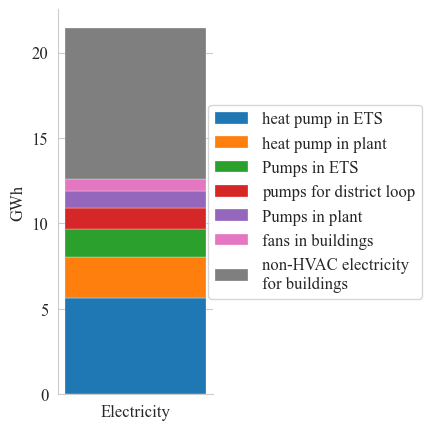

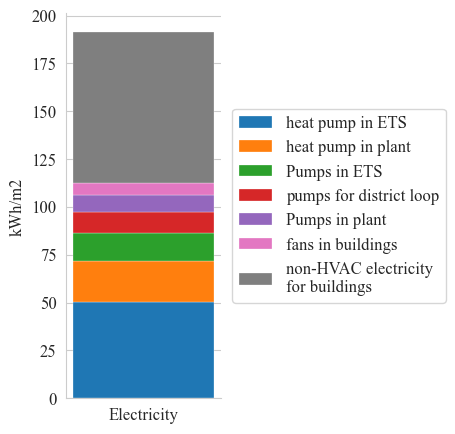

In [ ]:
folder = rf'...\{current_sim}' # Hard link to the simulation folder
folder_b = [k for k in os.listdir(folder) if 'ets' in k]
folder = os.path.join(folder, folder_b[0])
files = [k for k in os.listdir(folder) if k.startswith('Solution 1')]

res = pd.DataFrame()

for f in files:
    sheets = pd.ExcelFile(os.path.join(folder, f)).sheet_names
    
    modes = pd.read_excel(os.path.join(folder, f), sheet_name='Conversions')
    modes = modes[pd.notna(modes['Operational data sheet'])]
    modes['Operational data sheet'] = modes['Operational data sheet'].apply(lambda x: x.split('!')[0].replace("'", ''))
    modes['Mode'] = modes['Mode'].apply(lambda x: 'ETS HP' if x.startswith('ETS HP') else x)
    modes['ref'] = modes['Solution'] + ' - ' + modes['Hub'] + ' - ' + modes['Mode']
    modes['hub_num'] = modes['Hub'].apply(lambda x: int(x.replace('hub', '')) if 'hub' in x else 0)
    modes = modes.sort_values(['hub_num', 'Mode']).reset_index(drop=True)
    
    
    for k in modes.index:
        if modes.loc[k, 'Operational data sheet'] in sheets:
            temp = pd.read_excel(os.path.join(folder, f), 
                                 sheet_name = modes.loc[k, 'Operational data sheet'],
                                 skiprows=1).drop(columns=['Time step'])
            for h in ['Electricity-In (kW)', 'pump ele out-Out (kW)']:
                if h in temp.columns:
                    l = len(res)
                    for j in ['Solution', 'Name', 'Hub', 'Mode']:
                        res.loc[l, j] = modes.loc[k, j]
                    res.loc[l, 'Electricity'] = temp[h].sum()
    res['Name'] = res['Name'].apply(lambda x: 'Pump ETS' if x.startswith('Pump') else x)
    res_sum = res.groupby(['Solution', 'Name'], as_index=False).sum(numeric_only = True)

res = res[res['Solution'] == 'Solution 1']
res_sum = res_sum[res_sum['Solution'] == 'Solution 1']


dir_ini = r'PythonResources\Data\Consumption\exchange'

files_ini = [k for k in os.listdir(dir_ini) if k.endswith('.csv')]
ene_vect = set([k.split('_')[-1].replace('.csv', '') for k in files_ini])
retro = set([k.split('_')[0] for k in files_ini])
files_ini = [k for k in files_ini if k.startswith('futu') and 'ele' in k]

ele = pd.DataFrame()
for k in files_ini:
    lect = pd.read_csv(os.path.join(dir_ini, k), header=None)
    ele = pd.concat([ele, lect], axis=1)
if len(res) > 0:
    ele = pd.DataFrame(ele.sum(axis=1).to_list(), index = np.arange(1, len(lect) + 1))
nline = len(res_sum)
res_sum.loc[nline, 'Name'] = 'electricity buildings'
res_sum.loc[nline, 'Electricity'] = ele[0].sum()

nline = len(res_sum)
res_sum.loc[nline, 'Name'] = 'fans in buildings'
res_sum.loc[nline, 'Electricity'] = pd.read_excel(r'terminal_fan_load.xlsx', header = None, index_col=0)[1].sum()


res_plot = res_sum.copy()

replace_names = {'ETS HP': 'heat pump in ETS', 
                 'Main HP': 'heat pump in plant', 
                 'Pump ETS': 'Pumps in ETS',
                 'HEX pump ETS': 'pumps for district loop',
                 'cooling tower plant': 'Pumps in plant',
                 'electricity buildings':'non-HVAC electricity\nfor buildings'}

order_vars = {'ETS HP': 0, 
              'Main HP': 1, 
              'Pump ETS': 2,
              'HEX pump ETS': 3,
              'cooling tower plant': 4,
              'fans in buildings': 6,
              'electricity buildings': 7}

colors = {'ETS HP': 0, 
          'Main HP': 1, 
          'Pump ETS': 2,
          'HEX pump ETS': 3,
          'cooling tower plant': 4,
          'fans in buildings': 6,
          'electricity buildings': 7}

res_sum = res_plot.copy()
res_sum['name_ref'] = res_sum['Name'].apply(lambda x: replace_names[x] if x in replace_names.keys() else x)
res_sum['order'] = res_sum['Name'].apply(lambda x: order_vars[x])
res_sum['colors'] = res_sum['Name'].apply(lambda x: order_vars[x])
res_sum = res_sum.sort_values(['order'])

res_ele = res_sum.copy()
res_ele['Electricity'] = res_ele['Electricity'] / 1000000
res_ele['ele_sum'] = res_ele['Electricity'].cumsum()

plt.figure(figsize=(2,5))
for j, k in enumerate(res_ele.index):
    if j == 0:
        plt.bar('Electricity', res_ele.loc[k, 'Electricity'],  edgecolor = None, linewidth=0.2, 
                label = res_ele.loc[k, 'name_ref'], color = sns.color_palette('tab10')[colors[res_ele.loc[k, 'Name']]])
    else:
        plt.bar('Electricity', res_ele.loc[k, 'Electricity'], bottom = res_ele.loc[old, 'ele_sum'], 
                edgecolor = None, linewidth=0.2, label = res_ele.loc[k, 'name_ref'], color = sns.color_palette('tab10')[colors[res_ele.loc[k, 'Name']]])
    old = k
plt.legend(loc='center right', bbox_to_anchor=(2.4, 0.5))
plt.ylabel('GWh')
plt.gca().xaxis.grid(False)
plt.gca().spines[['right', 'top']].set_visible(False)
plt.savefig(r'img/energy.pdf', bbox_inches='tight')
plt.show()

res_m2 = res_sum.copy()
res_m2['Electricity'] = res_m2['Electricity'] / 111997
res_m2['name_ref'] = res_m2['Name'].apply(lambda x: replace_names[x] if x in replace_names.keys() else x)
res_m2['ele_sum'] = res_m2['Electricity'].cumsum()
res_m2 = res_m2.reset_index(drop=True)

plt.figure(figsize=(2,5))
for j, k in enumerate(res_m2.index):
    if j == 0:
        plt.bar('Electricity', res_m2.loc[k, 'Electricity'],  edgecolor = None, linewidth=0.2, 
                label = res_m2.loc[k, 'name_ref'], 
                color = sns.color_palette('tab10')[colors[res_m2.loc[k, 'Name']]])
    else:
        plt.bar('Electricity', res_m2.loc[k, 'Electricity'], bottom = res_m2.loc[old, 'ele_sum'], 
                edgecolor = None, linewidth=0.2, label = res_m2.loc[k, 'name_ref'], 
                color = sns.color_palette('tab10')[colors[res_m2.loc[k, 'Name']]])
    old = k
plt.legend(loc='center right', bbox_to_anchor=(2.5, 0.5))
plt.ylabel('kWh/m2')
plt.gca().xaxis.grid(False)
plt.gca().spines[['right', 'top']].set_visible(False)
plt.savefig(r'img/energy_m2.pdf', bbox_inches='tight')
plt.show()

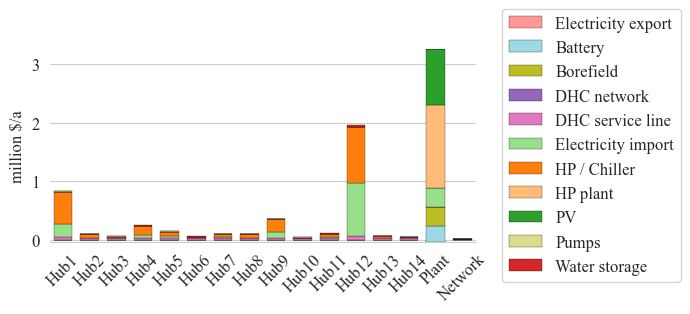

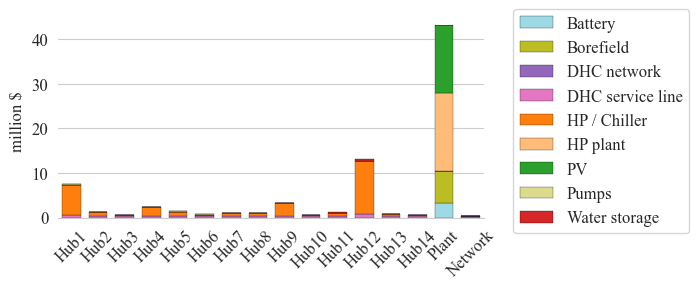

In [ ]:
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

folder_ini = rf'...\{current_sim}' # Hard link to the simulation folder

res = pd.DataFrame()
lect = pd.read_excel(folder_ini, sheet_name='Cost & CO2')
res = pd.concat([res, lect])

res = res[res['Type'].isin(['Conversion', 'Storage', 'Network', 'Import', 'Export'])]
# res = res[res['Type'].isin(['Conversion', 'Storage', 'Network', 'Import'])]


replace_names = {'A2W HP':'HP / Chiller', 
                 'ETS HP':'HP / Chiller', 
                 'local W2WHP': 'HP / Chiller',
                 'chiller': 'HP / Chiller',
                 'Gas Boiler (Linearized cost)':'Gas boiler',
                 'Generic Borehole':'Borefield', 
                 'Generic Hot Water Storage':'Water storage', 
                 'HEX ETS':'Grid connection',
                 'HEX pump ETS':'DHC service line',
                 'Individual Borehole':'Borefield', 
                 'Main HP':'HP plant', 
                 'Pump DHW':'Pumps', 
                 'Pump DHW gas':'Pumps', 
                 'Pump SH':'Pumps', 'Pump cooling': 'Pumps', 
                 'cooling_tower': 'Cooling tower', 
                 'cooling tower a2w': 'Cooling tower',
                 'cooling tower plant': 'Cooling tower', 
                 'cooling tower w2w': 'Cooling tower',
                 'cooling tower chiller': 'Cooling tower',
                 'Anergy':'DHC network',
                 'parking to pv': 'PV',
                 'rooftop to pv': 'PV',
                 'battery': 'Battery',
                 'Electricity': 'Electricity import',
                 'Gas': 'Gas import',
                 'export_electricity': 'Electricity export'}

colors= {'Borefield':16, 'Cooling tower':0, 'Gas boiler':14, 
         'DHC service line':12, 'HP / Chiller':2, 'HP plant':3, 'DHC network':8, 
         'Pumps':17, 'Water storage':6, 'Electricity import':5, 'Gas import':15, 
         'PV': 4, 'Battery': 19, 'Electricity export': 7}


network = ['Borefield', 'DHC service line', 'HP plant', 'DHC network', 'Battery', 'PV']

res['Name'] = res['Name'].apply(lambda x: 'Generic Hot Water Storage' if 'Generic Hot Water Storage' in x else x)
res['Name'] = res['Name'].apply(lambda x: 'Individual Borehole' if 'Individual Borehole' in x else x)
res['Name'] = res['Name'].replace(replace_names)
res.loc[res['Type'] == 'Network', 'Hub or Link'] = 'Network'

res1 = res.groupby(['Stage', 'Name', 'Type'], as_index= False).sum(numeric_only=True)
res1 = res1[res1['Life-cycle cost (USD)'] != 0]
res1 = res1.sort_values('Life-cycle cost (USD)', ascending = False)
res1.index = res1['Name']
res1 = res1[['Annualized life-cycle cost (USD/year)', 'Investment (USD)']]
res1 = res1.rename(columns = {'Annualized life-cycle cost (USD/year)': r'{\makecell{ALCC \\ (million \$/a)}}', 'Investment (USD)': r'{\makecell{Investment \\ (million \$)}}'})
res1 = res1 / 1000000
res1.loc['Total'] = res1.sum(numeric_only=True)
# res1 = res1.round(1)

res2 = res[res['Life-cycle cost (USD)'] != 0]

alcc_h = pd.pivot_table(res2, values = 'Annualized life-cycle cost (USD/year)', index= 'Name', columns= 'Hub or Link')
hub_cols = [col for col in alcc_h.columns if col.startswith('hub')]
hub_cols = sorted(hub_cols, key=lambda x: int(x[3:]))
hub_cols.append('plant')
hub_cols.append('Network')
alcc_h = alcc_h[hub_cols]
alcc_plot = alcc_h.copy()
alcc_h.columns = ['{' + col.capitalize() + '}' for col in alcc_h.columns]
col_format = 'l'
for k in alcc_h.columns:
    ndigits = alcc_h[k].apply(lambda x: len(str(int(x))) if pd.notna(x) else x).max()
    col_format = f'{col_format}S[table-format={ndigits}]'

inv_h = pd.pivot_table(res2, values = 'Investment (USD)', index= 'Name', columns= 'Hub or Link')
hub_cols = [col for col in inv_h.columns if col.startswith('hub')]
hub_cols = sorted(hub_cols, key=lambda x: int(x[3:]))
hub_cols.append('plant')
hub_cols.append('Network')
inv_h = inv_h[hub_cols]
inv_plot = inv_h.copy()
inv_h.columns = ['{' + col.capitalize() + '}' for col in inv_h.columns]
col_format = 'l'
for k in inv_h.columns:
    ndigits = inv_h[k].apply(lambda x: len(str(int(x))) if pd.notna(x) else x).max()
    col_format = f'{col_format}S[table-format={ndigits}]'

alcc_plot.columns = alcc_plot.columns.str.capitalize()
alcc_plot = alcc_plot.fillna(0)
alcc_plot = alcc_plot / 1000000
new_order = ['Electricity export'] + [idx for idx in alcc_plot.index if idx != 'Electricity export']
alcc_plot = alcc_plot.loc[new_order]
alcc_cumplot = alcc_plot.cumsum()

plt.figure(figsize=(5.5, 2.5))
for j, k in enumerate(alcc_plot.index):
    if j == 0:
        plt.bar(alcc_plot.columns, alcc_plot.loc[k, :],  edgecolor = 'black', linewidth=0.2, 
                color=sns.color_palette("tab20")[colors[k]], width=0.7, label = k)
    else:
        plt.bar(alcc_plot.columns, alcc_plot.loc[k, :], bottom = alcc_cumplot.loc[old, :], 
                edgecolor = 'black', linewidth=0.2, 
                color=sns.color_palette("tab20")[colors[k]], width=0.7, label = k)
    old = k
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))
sns.despine(left=True)
plt.gca().xaxis.grid(False)
plt.gca().tick_params(axis='x', labelrotation=45)
plt.ylabel('million $/a')
plt.margins(x=0.01)
plt.savefig(rf'img/alcc_hub.pdf', bbox_inches='tight')
plt.show()

inv_plot.columns = inv_plot.columns.str.capitalize()
inv_plot = inv_plot.fillna(0)
inv_plot = inv_plot / 1000000
inv_cumplot = inv_plot.cumsum()

plt.figure(figsize=(5.5, 2.5))
for j, k in enumerate(inv_plot.index):
    if j == 0:
        plt.bar(inv_plot.columns, inv_plot.loc[k, :],  edgecolor = 'black', linewidth=0.2, 
                color=sns.color_palette("tab20")[colors[k]], width=0.7, label = k)
    else:
        plt.bar(inv_plot.columns, inv_plot.loc[k, :], bottom = inv_cumplot.loc[old, :], 
                edgecolor = 'black', linewidth=0.2, 
                color=sns.color_palette("tab20")[colors[k]], width=0.7, label = k)
    old = k
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5))
sns.despine(left=True)
plt.gca().xaxis.grid(False)
plt.gca().tick_params(axis='x', labelrotation=45)
plt.ylabel('million $')
plt.margins(x=0.01)
plt.savefig(rf'img/inv_hub.pdf', bbox_inches='tight')
plt.show()

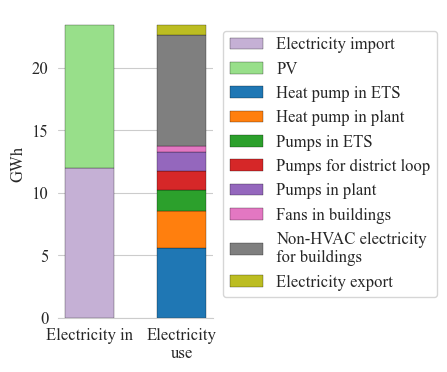

In [ ]:
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

folder = rf'...\{current_sim}' # Hard link to the simulation folder
folder_b = [k for k in os.listdir(folder) if 'ets' in k]
folder = os.path.join(folder, folder_b[0])
files = [k for k in os.listdir(folder) if k.startswith('Solution 3')]

res = pd.DataFrame()

for f in files:
    sheets = pd.ExcelFile(os.path.join(folder, f)).sheet_names
    
    modes = pd.read_excel(os.path.join(folder, f), sheet_name='Conversions')
    modes = modes[pd.notna(modes['Operational data sheet'])]
    modes['Operational data sheet'] = modes['Operational data sheet'].apply(lambda x: x.split('!')[0].replace("'", ''))
    modes['Mode'] = modes['Mode'].apply(lambda x: 'ETS HP' if x.startswith('ETS HP') else x)
    modes['ref'] = modes['Solution'] + ' - ' + modes['Hub'] + ' - ' + modes['Mode']
    modes['hub_num'] = modes['Hub'].apply(lambda x: int(x.replace('hub', '')) if 'hub' in x else 0)
    modes = modes.sort_values(['hub_num', 'Mode']).reset_index(drop=True)
    
    
    for k in modes.index:
        if modes.loc[k, 'Operational data sheet'] in sheets:
            temp = pd.read_excel(os.path.join(folder, f), 
                                 sheet_name = modes.loc[k, 'Operational data sheet'],
                                 skiprows=1).drop(columns=['Time step'])
            for h in ['Electricity-In (kW)', 'pump ele out-Out (kW)']:
                if h in temp.columns:
                    l = len(res)
                    for j in ['Solution', 'Name', 'Hub', 'Mode']:
                        res.loc[l, j] = modes.loc[k, j]
                    res.loc[l, 'Electricity'] = temp[h].sum()
    res['Name'] = res['Name'].apply(lambda x: 'Pump ETS' if x.startswith('Pump') else x)
    res_sum = res.groupby(['Solution', 'Name'], as_index=False).sum(numeric_only = True)

res = res[res['Solution'] == 'Solution 3']
res_sum = res_sum[res_sum['Solution'] == 'Solution 3']


dir_ini = r'PythonResources\Data\Consumption\exchange'

files_ini = [k for k in os.listdir(dir_ini) if k.endswith('.csv')]
ene_vect = set([k.split('_')[-1].replace('.csv', '') for k in files_ini])
retro = set([k.split('_')[0] for k in files_ini])
files_ini = [k for k in files_ini if k.startswith('futu') and 'ele' in k]

ele = pd.DataFrame()
for k in files_ini:
    lect = pd.read_csv(os.path.join(dir_ini, k), header=None)
    ele = pd.concat([ele, lect], axis=1)
if len(res) > 0:
    ele = pd.DataFrame(ele.sum(axis=1).to_list(), index = np.arange(1, len(lect) + 1))
nline = len(res_sum)
res_sum.loc[nline, 'Name'] = 'electricity buildings'
res_sum.loc[nline, 'Electricity'] = ele[0].sum()

nline = len(res_sum)
res_sum.loc[nline, 'Name'] = 'fans in buildings'
res_sum.loc[nline, 'Electricity'] = pd.read_excel(r'terminal_fan_load.xlsx', header = None, index_col=0)[1].sum()

exports = pd.read_excel(os.path.join(folder, files[0]), sheet_name='Exports')
exports = exports[exports['Name'] == 'export_electricity']
nline = len(res_sum)
res_sum.loc[nline, 'Name'] = 'Electricity export'
res_sum.loc[nline, 'Electricity'] = exports.iloc[0]['Exported energy (kWh/year)']

res_plot = res_sum.copy()

res_imp = pd.DataFrame()
imports = pd.read_excel(os.path.join(folder, files[0]), sheet_name='Imports')
imports = imports[imports['Name'] == 'Electricity']
res_imp.loc['Electricity import', 'Energy'] = imports['Imported energy (kWh/year)'].sum()

onsite = pd.read_excel(os.path.join(folder, files[0]), sheet_name='Onsite Resources')
res_imp.loc['PV', 'Energy'] = onsite['Total energy (kWh/year)'].sum()

replace_names = {'ETS HP': 'Heat pump in ETS', 
                 'Main HP': 'Heat pump in plant', 
                 'Pump ETS': 'Pumps in ETS',
                 'HEX pump ETS': 'Pumps for district loop',
                 'cooling tower plant': 'Pumps in plant',
                 'electricity buildings':'Non-HVAC electricity\nfor buildings',
                 'fans in buildings': 'Fans in buildings'}

order_vars = {'ETS HP': 0, 
              'Main HP': 1, 
              'Pump ETS': 2,
              'HEX pump ETS': 3,
              'cooling tower plant': 4,
              'fans in buildings': 6,
              'electricity buildings': 7,
              'Electricity export': 8}

colors = {'ETS HP': 0, 
          'Main HP': 1, 
          'Pump ETS': 2,
          'HEX pump ETS': 3,
          'cooling tower plant': 4,
          'fans in buildings': 6,
          'electricity buildings': 7,
          'Electricity export': 8,
          'Electricity import': 9,
          'PV': 5}

res_sum = res_plot.copy()
res_sum['name_ref'] = res_sum['Name'].apply(lambda x: replace_names[x] if x in replace_names.keys() else x)
res_sum['order'] = res_sum['Name'].apply(lambda x: order_vars[x])
res_sum['colors'] = res_sum['Name'].apply(lambda x: order_vars[x])
res_sum = res_sum.sort_values(['order'])

res_ele = res_sum.copy()
res_ele['Electricity'] = res_ele['Electricity'] / 1000000
res_ele['ele_sum'] = res_ele['Electricity'].cumsum()

res_imp['Energy'] = res_imp['Energy'] / 1000000
res_imp['ele_sum'] = res_imp['Energy'].cumsum()

plt.figure(figsize=(2, 4))
x_pos = [0, 1.5]
for j, k in enumerate(res_imp.index):
    if j == 0:
        plt.bar(0, res_imp.loc[k, 'Energy'],  linewidth=0.2, edgecolor = 'black',
                label = k, color = sns.color_palette('tab20')[colors[k]])
    else:
        plt.bar(0, res_imp.loc[k, 'Energy'], bottom = res_imp.loc[old, 'ele_sum'], 
                edgecolor = 'black', linewidth=0.2, label = k, color = sns.color_palette('tab20')[colors[k]])
    old = k
for j, k in enumerate(res_ele.index):
    if j == 0:
        plt.bar(1.5, res_ele.loc[k, 'Electricity'],  edgecolor = 'black', linewidth=0.2, 
                label = res_ele.loc[k, 'name_ref'], color = sns.color_palette('tab10')[colors[res_ele.loc[k, 'Name']]])
    else:
        plt.bar(1.5, res_ele.loc[k, 'Electricity'], bottom = res_ele.loc[old, 'ele_sum'], 
                edgecolor = 'black', linewidth=0.2, label = res_ele.loc[k, 'name_ref'], color = sns.color_palette('tab10')[colors[res_ele.loc[k, 'Name']]])
    old = k
plt.xticks(x_pos, ['Electricity in', 'Electricity\nuse'])
plt.legend(loc='center right', bbox_to_anchor=(2.5, 0.5))
plt.ylabel('GWh')
plt.gca().xaxis.grid(False)
sns.despine(left=True)
plt.savefig(energy_in_out_sol3.pdf', bbox_inches='tight')
plt.show()

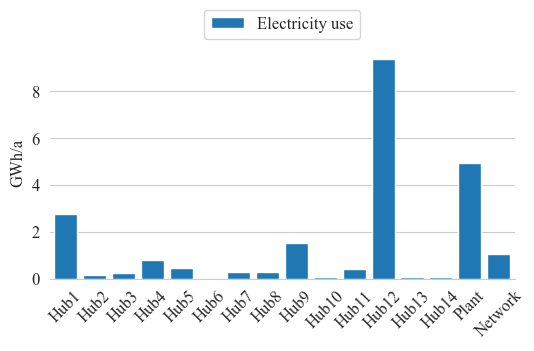

In [ ]:
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

folder = rf'...\{current_sim}' # Hard link to the simulation folder
folder_b = [k for k in os.listdir(folder) if 'ets' in k]
folder = os.path.join(folder, folder_b[0])
file = [k for k in os.listdir(folder) if k.startswith('Solution 3')][0]
file = os.path.join(folder, file)

sheets = pd.ExcelFile(file).sheet_names

imp = pd.read_excel(file, sheet_name='Imports')
imp = imp[imp['Name'] == 'Electricity']
imp = imp.rename(columns = {'Imported energy (kWh/year)': 'ele_in'})


file = os.path.join(folder, file)
onsite = pd.read_excel(file, sheet_name='Cost & CO2')
onsite = onsite[onsite['Name'].isin(['pv to hub', 'pv to electricity'])]
onsite = onsite.rename(columns = {'Energy in (kWh/year)': 'ele_in', 'Hub or Link': 'Hub'})

res = pd.concat([imp, onsite])
res = res.groupby(['Hub'], as_index=False).sum(numeric_only=True)

modes = pd.read_excel(file, sheet_name='Conversions')
modes = modes[pd.notna(modes['Operational data sheet'])]
modes = modes[modes['Name'] == 'HEX pump ETS']
modes['Operational data sheet'] = modes['Operational data sheet'].apply(lambda x: x.split('!')[0].replace("'", ''))
for m in modes.index:
    if modes.loc[m, 'Operational data sheet'] in sheets:
        temp = pd.read_excel(file, 
                    sheet_name = modes.loc[m, 'Operational data sheet'],
                    skiprows=1).drop(columns=['Time step'])
        res.loc[res[res['Hub'] == modes.loc[m, 'Hub']].index, 'pump_network'] = temp['Electricity-In (kW)'].sum()
res['pump_network'] = res['pump_network'].fillna(0)
res['ele_in_final'] = res['ele_in'] - res['pump_network']
nline = len(res)
res.loc[nline, 'Hub'] = 'Network'
res.loc[nline, 'ele_in_final'] = res['pump_network'].sum()

res['hub_num'] = res['Hub'].apply(lambda x: int(x.replace('hub', '')) if 'hub' in x else 50)
res = res.sort_values(['hub_num']).reset_index(drop=True)
res['Hub'] = res['Hub'].apply(lambda x: x.capitalize())
res['ele_in_final'] = res['ele_in_final'] / 1000000

plt.figure(figsize=(6,3))
plt.bar(res['Hub'], res['ele_in_final'], label = 'Electricity use')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2))
plt.ylabel('GWh/a')
plt.gca().xaxis.grid(False)
sns.despine(left=True)
plt.gca().tick_params(axis='x', labelrotation=45)
plt.margins(x=0.01)
plt.savefig(r'ele_per_hub.pdf', bbox_inches='tight')
plt.show()
